In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
music=pd.read_csv('Resources/spotify_dataset_new.csv')
music.head(2)
music['Track Popularity']=music.rename(columns={'Track Popularity':'Track_Popularity'},inplace=True)
music=music.drop(columns=['Artist Name',	'Artist ID',	'Artist Popularity',	'Artist genre',	'Album Name',	'Album ID','type','id','uri','track_href','analysis_url','Track Popularity'])
music_ordered = music[music['Track_Popularity'] > 0]

music_ordered[['mode', 'key', 'time_signature']] = \
    music_ordered[['mode', 'key', 'time_signature']].astype('category')



music_ordered.head(1)

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Track Name,Track_Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,85,0.825,0.652,1,-3.183,0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713,4


In [7]:
music_ordered.shape

(608, 15)

In [8]:
#adding a new column to classify musics according to their popularity
classified=music_ordered.copy()

classified['Popularity_rating']=''

for i,row in classified.iterrows():
    score='unpopular'
    if (row.Track_Popularity>50)&(row.Track_Popularity<75):
        score='medium'
    elif row.Track_Popularity>=75:
        score='popular'
    classified.at[i,'Popularity_rating']=score

classified[['Track Name','Track_Popularity','Popularity_rating']]
    

,Track Name,Track_Popularity,Popularity_rating
0,Shape of You,85,popular
1,Blinding Lights,90,popular
2,Dance Monkey,76,popular
3,rockstar (feat. 21 Savage),84,popular
4,Someone You Loved,87,popular
...,...,...,...
645,THATS WHAT I WANT,86,popular
646,You Shook Me All Night Long,81,popular
647,telepatía,82,popular
648,How You Like That,77,popular


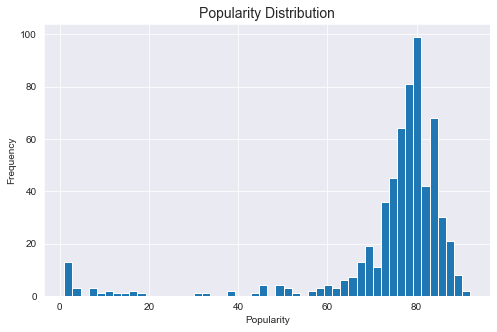

In [9]:
#Visualizing EDA
fig,ax=plt.subplots(1,1,figsize=(8,5))
_ = music_ordered['Track_Popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

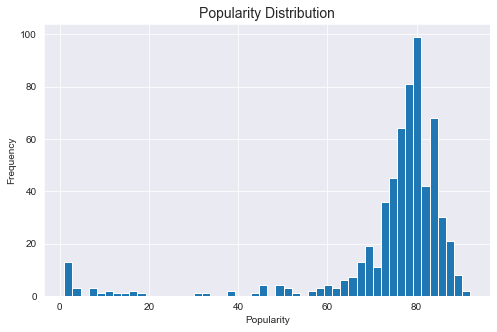

In [10]:
#Visualizing EDA
fig,ax=plt.subplots(1,1,figsize=(8,5))
_ = music_ordered['Track_Popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

In [11]:
music_ordered[['Track_Popularity']].describe()

,Track_Popularity
count,608.000000
mean,74.098684
std,16.734090
min,1.000000
25%,74.000000
50%,78.000000
75%,82.000000
max,92.000000


In [12]:
music_ordered.corr()

,Track_Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Track_Popularity,1.000000,-0.041961,-0.016764,-0.006166,-0.070348,0.092813,-0.011290,-0.004922,0.020744,0.004054,-0.106360
danceability,-0.041961,1.000000,0.001256,0.095239,0.252901,-0.132399,-0.029610,-0.062788,0.376558,-0.162987,-0.262112
energy,-0.016764,0.001256,1.000000,0.703408,-0.029650,-0.582171,-0.106765,0.142430,0.451731,0.086625,0.032325
loudness,-0.006166,0.095239,0.703408,1.000000,-0.064055,-0.397007,-0.198710,0.063716,0.295292,0.066628,-0.059902
speechiness,-0.070348,0.252901,-0.029650,-0.064055,1.000000,-0.015448,-0.011680,0.056041,-0.021130,0.085520,-0.114805
acousticness,0.092813,-0.132399,-0.582171,-0.397007,-0.015448,1.000000,0.088277,-0.076481,-0.267307,-0.102756,-0.050815
instrumentalness,-0.011290,-0.029610,-0.106765,-0.198710,-0.011680,0.088277,1.000000,-0.012401,-0.131905,-0.056284,0.129354
liveness,-0.004922,-0.062788,0.142430,0.063716,0.056041,-0.076481,-0.012401,1.000000,0.026756,0.071117,-0.018754
valence,0.020744,0.376558,0.451731,0.295292,-0.021130,-0.267307,-0.131905,0.026756,1.000000,-0.021503,-0.110133
tempo,0.004054,-0.162987,0.086625,0.066628,0.085520,-0.102756,-0.056284,0.071117,-0.021503,1.000000,0.013374


In [13]:
def scat_plot(x, y, hue=None, xlab='', ylab='', titl=''): #'''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x, y, hue=hue, s=12)
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.legend(fontsize=12)
    plt.show()
    
    
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    #'''Plots a scatterplot with a regression lineusing given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x, y, data=data, scatter_kws={"s": 10}, line_kws={'color':'r'})
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.ylim(-3, 103)
    plt.show()

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


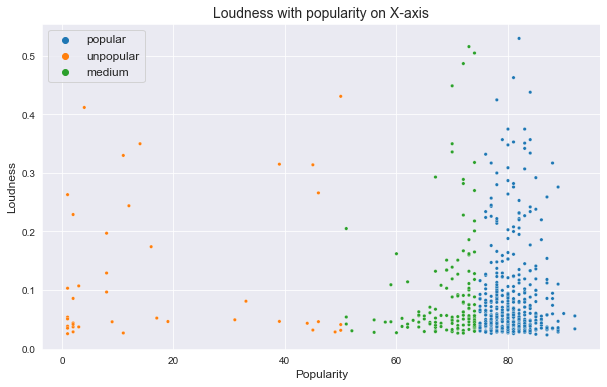

In [14]:
s = music_ordered

scat_plot(s.Track_Popularity, s.speechiness, hue=classified.Popularity_rating, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


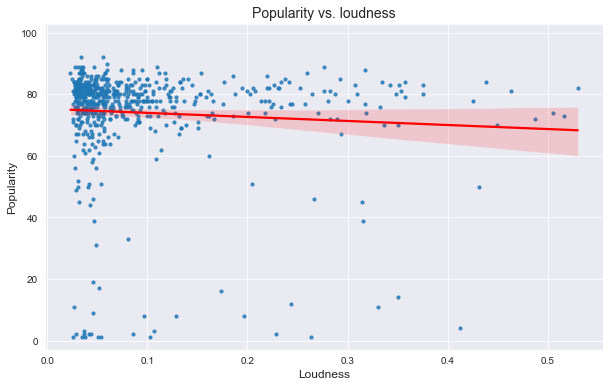

In [15]:
#regress plot
regress_plot('speechiness', 'Track_Popularity', data=s, xlab='Loudness',\
         ylab='Popularity', titl='Popularity vs. loudness')


/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


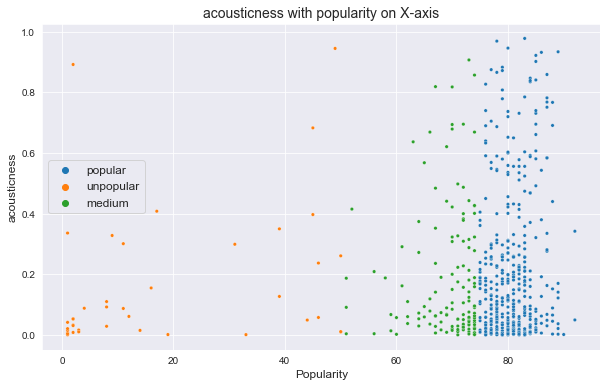

In [16]:
scat_plot(s.Track_Popularity, s.acousticness, hue=classified.Popularity_rating, xlab='Popularity',\
         ylab='acousticness', titl='acousticness with popularity on X-axis')

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


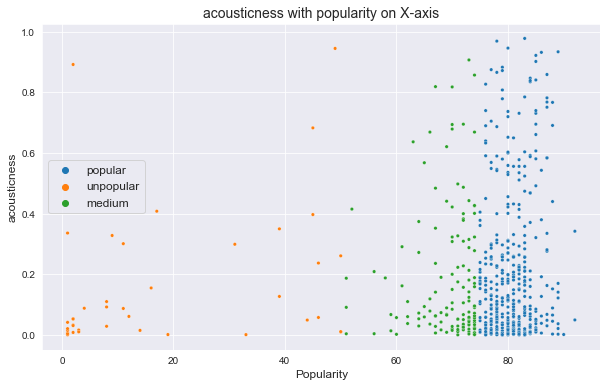

In [17]:
scat_plot(s.Track_Popularity, s.acousticness, hue=classified.Popularity_rating, xlab='Popularity',\
         ylab='acousticness', titl='acousticness with popularity on X-axis')

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


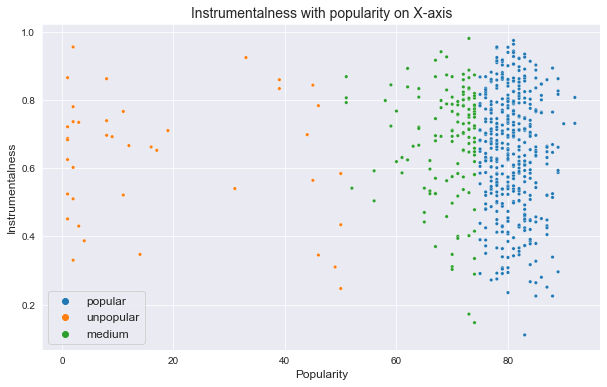

In [18]:
scat_plot(s.Track_Popularity, s.energy, hue=classified.Popularity_rating, xlab='Popularity',\
         ylab='Instrumentalness', titl='Instrumentalness with popularity on X-axis')

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


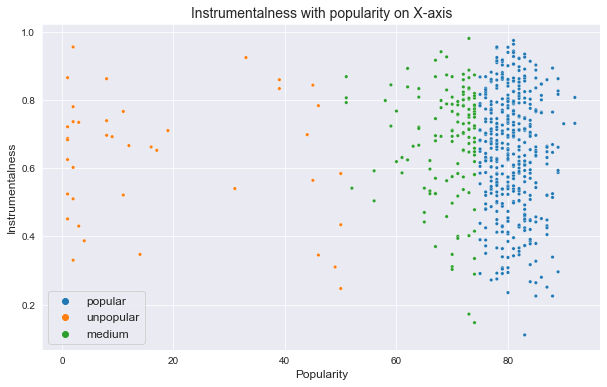

In [19]:
scat_plot(s.Track_Popularity, s.energy, hue=classified.Popularity_rating, xlab='Popularity',\
         ylab='Instrumentalness', titl='Instrumentalness with popularity on X-axis')

/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


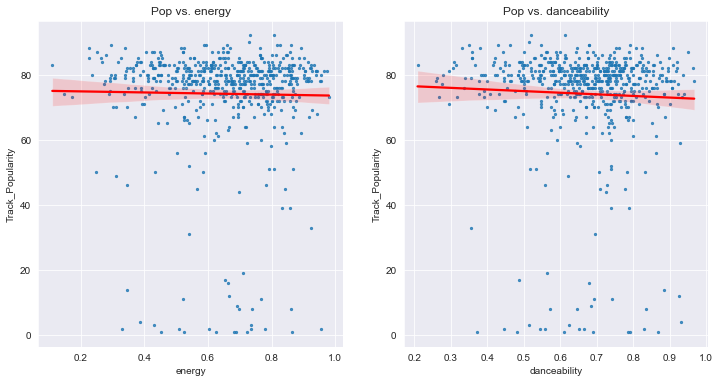

In [20]:
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
_ = sns.regplot(s.energy, s.Track_Popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. energy')

ax2 = plt.subplot(1,2,2)
_ = sns.regplot(s.danceability, s.Track_Popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. danceability')


In [21]:
#Linear Regress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set random state
state=25

# Shuffle the data
reg_data = music_ordered.sample(frac=1, random_state=state).reset_index(drop=True)

# First, try without categoricals
X = reg_data.select_dtypes(include='number').drop('Track_Popularity', axis=1)
y = reg_data.Track_Popularity

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

In [22]:
def custom_loss(prediction, actual):
    paired = zip(prediction, actual)
    listed = list(paired)
    diffs = {'Under five': 0, 'Five to ten': 0, 'Over ten': 0, 'Average error': 0}
    sum = 0

    for pair in listed:
        sum += abs(pair[0] - pair[1])
        if abs(pair[0] - pair[1]) < 5:
            diffs['Under five'] += 1
        elif 5 <= abs(pair[0] - pair[1]) < 10:
            diffs['Five to ten'] += 1
        else:
            diffs['Over ten'] += 1
            
    diffs['Average error'] = sum / len(listed)
     
    return diffs

In [23]:
%%time

linreg = LinearRegression()
linreg.fit(X_train, y_train)

lin_pred = linreg.predict(X_test)

print(linreg.score(X_test, y_test))

-0.006521469994076101
CPU times: user 1.46 s, sys: 43.4 ms, total: 1.5 s
Wall time: 1.52 s


In [24]:
custom_loss(lin_pred, y_test)

{'Under five': 65,
 'Five to ten': 51,
 'Over ten': 36,
 'Average error': 10.323448967129453}

In [25]:
no_artist = reg_data.drop(['Track Name'], axis=1)
df_encoded = pd.get_dummies(no_artist)
df_encoded.columns

Index(['Track_Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0',
       'mode_1', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [26]:
XX = df_encoded.drop('Track_Popularity', axis=1)
yy = df_encoded.Track_Popularity

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.25, random_state=state)

In [27]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

-0.04224602789177068
CPU times: user 17.4 ms, sys: 8.67 ms, total: 26.1 ms
Wall time: 8.71 ms


In [28]:
custom_loss(lr_pred, y_test)

{'Under five': 65,
 'Five to ten': 51,
 'Over ten': 36,
 'Average error': 10.54161701266811}

In [29]:
from sklearn.model_selection import cross_val_score

# Use the regressor from above to set up the cross_val
cvals = cross_val_score(lr, XX, yy, cv=6)

# check the results
print(cvals)
print('The mean cross-validatoin score is: {num:.{dig}f}'.format\
      (num=np.mean(cvals), dig=4))

[-0.06654626 -0.0491667  -0.12892975 -0.03933236 -0.07040046  0.01123217]
The mean cross-validatoin score is: -0.0572


In [30]:
%%time
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)

print(ridge.score(X_test, y_test))

-0.02169368766916646
CPU times: user 8.25 ms, sys: 22.3 ms, total: 30.6 ms
Wall time: 11.1 ms


/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [31]:
custom_loss(ridge.predict(X_test), y_test)

{'Under five': 68,
 'Five to ten': 51,
 'Over ten': 33,
 'Average error': 10.318358274323936}

In [32]:
from sklearn.model_selection import GridSearchCV

alphas = {'alpha': [0.0005, 0.0006, 0.00075, 0.0009, 0.001]}

rg = Ridge(normalize=True)

rg_cv = GridSearchCV(rg, alphas, cv=6)

rg_cv.fit(XX, yy)

print(rg_cv.best_params_)
print(rg_cv.best_score_)

{'alpha': 0.001}
-0.05707870818283602


/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/Users/huzeyfecanbaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a prepro

Plotting actual vs predicted values

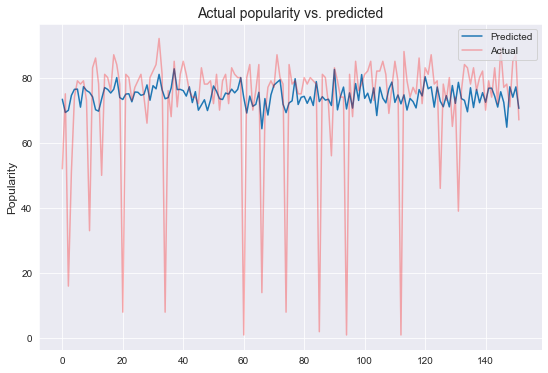

In [33]:
fig = plt.subplots(figsize=(9,6))
_ = plt.plot(list(rg_cv.predict(X_test))[:500], label='Predicted')
_ = plt.plot(list(y_test)[:500], c='r', alpha=0.3, label='Actual')
_ = plt.legend(loc='upper right')
_ = plt.ylabel('Popularity', fontsize=12)
_ = plt.title('Actual popularity vs. predicted', fontsize=14)

Classification

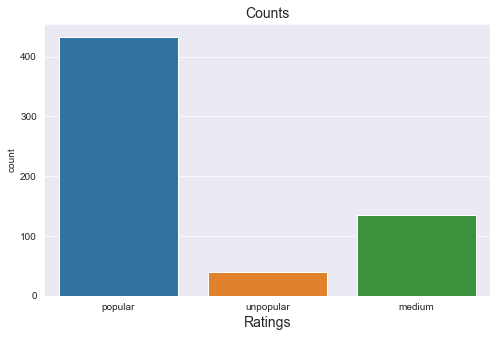

In [34]:
#Class count
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='Popularity_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

In [35]:
#Creating a balanced sample for the final test set
music = pd.get_dummies(classified, columns=['key', 'mode', 'time_signature'])
music.shape

(608, 31)

In [36]:
from sklearn.model_selection import train_test_split

df_pop = music[music.Popularity_rating == 'popular']

df_med = music[music.Popularity_rating == 'medium']

df_unpop = music[music.Popularity_rating == 'unpopular']

# Set random seed
state=25

X_tr_p, X_ts_p, y_tr_p, y_ts_p = train_test_split(df_pop.drop(['Track_Popularity', 'Popularity_rating'], axis=1),\
                                                 df_pop.Popularity_rating, test_size=0.15, random_state=state)

X_tr_m, X_ts_m, y_tr_m, y_ts_m = train_test_split(df_med.drop(['Track_Popularity', 'Popularity_rating'], axis=1),\
                                                 df_med.Popularity_rating, test_size=0.15, random_state=state)

X_tr_up, X_ts_up, y_tr_up, y_ts_up = train_test_split(df_unpop.drop(['Track_Popularity', 'Popularity_rating'], axis=1),\
                                                 df_unpop.Popularity_rating, test_size=0.15, random_state=state)

In [37]:
pop_train = pd.concat([X_tr_p, y_tr_p], axis=1)
med_train = pd.concat([X_tr_m, y_tr_m], axis=1)
unpop_train = pd.concat([X_tr_up, y_tr_up], axis=1)

training = pd.concat([pop_train, med_train, unpop_train], axis=0)

training = training.sample(frac=1, random_state=state).reset_index(drop=True)

# Popularity has been removed, so only 42 columns
training.shape

(516, 30)

In [38]:
pop_test = pd.concat([X_ts_p, y_ts_p], axis=1)
med_test = pd.concat([X_ts_m, y_ts_m], axis=1)
unpop_test = pd.concat([X_ts_up, y_ts_up], axis=1)

final_test = pd.concat([pop_test, med_test, unpop_test], axis=0)

final_test = final_test.sample(frac=1, random_state=state).reset_index(drop=True)

final_test.shape

(92, 30)

Validation and Train sets

In [43]:
X_class = training.drop(columns=['Popularity_rating','Track Name'], axis=1)
y_class = training.Popularity_rating

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.25, random_state=state)

In [44]:
X_train

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
325,0.896,0.586,-6.687,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653,...,0,0,1,0,1,0,0,0,1,0
290,0.647,0.514,-10.050,0.0593,0.0655,0.000000,0.3980,0.386,79.975,240693,...,1,0,0,0,0,1,0,0,1,0
134,0.516,0.595,-4.630,0.0313,0.0275,0.000000,0.1090,0.222,119.972,340707,...,0,0,0,0,0,1,0,0,1,0
112,0.729,0.735,-5.455,0.0919,0.0178,0.000193,0.0890,0.544,121.986,255867,...,0,0,0,0,0,1,0,0,1,0
100,0.744,0.859,-3.166,0.0795,0.0256,0.000063,0.0881,0.787,91.977,232787,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.612,0.280,-8.648,0.0434,0.9320,0.000000,0.0880,0.387,72.795,213827,...,0,0,0,0,0,1,0,0,1,0
143,0.679,0.662,-6.069,0.1740,0.1550,0.000000,0.1520,0.438,99.879,222801,...,1,0,0,0,1,0,0,0,1,0
474,0.524,0.364,-10.209,0.0367,0.8080,0.000000,0.1000,0.436,75.240,209831,...,0,0,0,0,0,1,0,0,1,0
318,0.669,0.574,-6.442,0.0286,0.0175,0.002940,0.1460,0.273,120.013,196400,...,0,0,0,0,1,0,0,0,1,0


In [45]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Basic decision tree
dt = DecisionTreeClassifier(max_depth=20, random_state=state)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

print(accuracy_score(pred, y_test))

0.627906976744186
CPU times: user 8.44 ms, sys: 3.34 ms, total: 11.8 ms
Wall time: 13.6 ms


In [46]:
params = {'max_depth': [2, 10, 20, 40, 50],
         'min_samples_leaf': np.arange(1,10,2),}

dt = DecisionTreeClassifier(random_state=state)

dt_cv = GridSearchCV(dt, params, cv=6)

dt_cv.fit(X_class, y_class)

print(dt_cv.best_params_)
print('The average runtime is: ', np.mean(dt_cv.cv_results_['mean_fit_time']))
print('The best score is: ', dt_cv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 7}
The average runtime is:  0.0032599067687988283
The best score is:  0.689922480620155


In [47]:
#Validation set
p = dt_cv.best_estimator_.predict(X_test)

print(accuracy_score(p, y_test))

0.7984496124031008


Bagging

In [49]:

%%time

from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=state)
bc = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=state)

bag_cv = cross_val_score(bc, X_class, y_class, cv=6)

print(bag_cv)
print('The mean cross-validatoin score is: {num:.{dig}f}'.format\
      (num=np.mean(bag_cv), dig=4))

[0.72093023 0.72093023 0.70930233 0.70930233 0.70930233 0.70930233]
The mean cross-validatoin score is: 0.7132
CPU times: user 750 ms, sys: 8.25 ms, total: 758 ms
Wall time: 756 ms


Random Forest

In [50]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=state)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print(accuracy_score(rf_pred, y_test))

0.7829457364341085
CPU times: user 115 ms, sys: 4.64 ms, total: 120 ms
Wall time: 119 ms


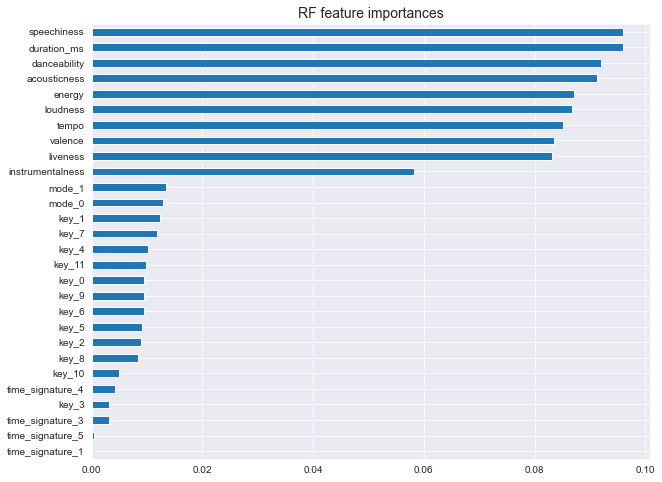

In [51]:
important = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values()

fig = plt.subplots(figsize=(10,8))
_ = important.plot(kind='barh')
_ = plt.title('RF feature importances', fontsize=14)

Confusion Matrixes

Bagging

In [52]:
from sklearn.metrics import confusion_matrix

bc.fit(X_train, y_train)

confusion_matrix(y_test, bc.predict(X_test))

array([[  0,  20,   0],
       [  0, 103,   0],
       [  0,   6,   0]])

Random Forest

In [53]:
confusion_matrix(y_test, rf_pred)

array([[  0,  20,   0],
       [  2, 101,   0],
       [  0,   6,   0]])